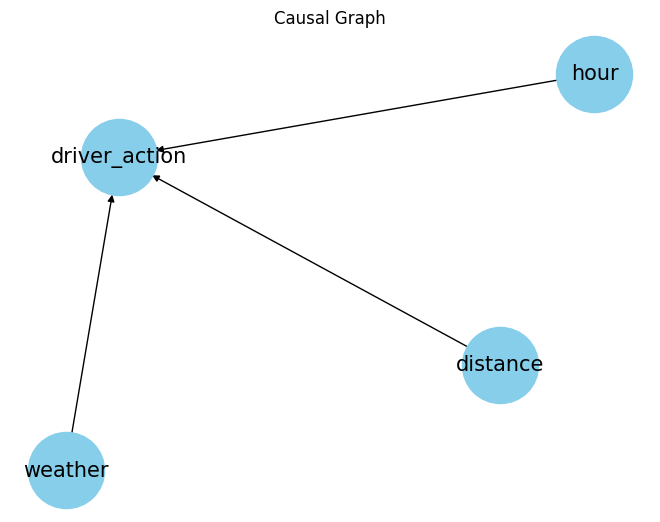

KeyError: "None of [Index(['hour', 'distance', 'weather'], dtype='object')] are in the [columns]"

In [5]:
import pandas as pd
import sys
sys.path.append('..')
from src.data_loader import DataLoader
from src.casual_inference import CausalInference

# Load data
data = DataLoader.load_data('../data/drivers_location_during_request.csv')


In [5]:
% pip install pgmpy


UsageError: Line magic function `%` not found.


   trip_duration  Day of Week  Hour of Day  Driving Speed (km/h)  Is Weekend  \
0          34.25            3           10             14.295845           0   
1          34.25            3           10             14.295845           0   
2          34.25            3           10             14.295845           0   
3          34.25            3           10             14.295845           0   
4          34.25            3           10             14.295845           0   

   Trip Distance (km)  drivers_lat  drivers_lon  Origin Lat  Origin Lon  \
0            8.160545     6.549147     3.392184    6.565088    3.384441   
1            8.160545     6.570408     3.396597    6.565088    3.384441   
2            8.160545     6.566144     3.366483    6.565088    3.384441   
3            8.160545     6.576791     3.389592    6.565088    3.384441   
4            8.160545     6.577215     3.371172    6.565088    3.384441   

   Destination Lat  Destination Lon  
0         6.499696         3.3

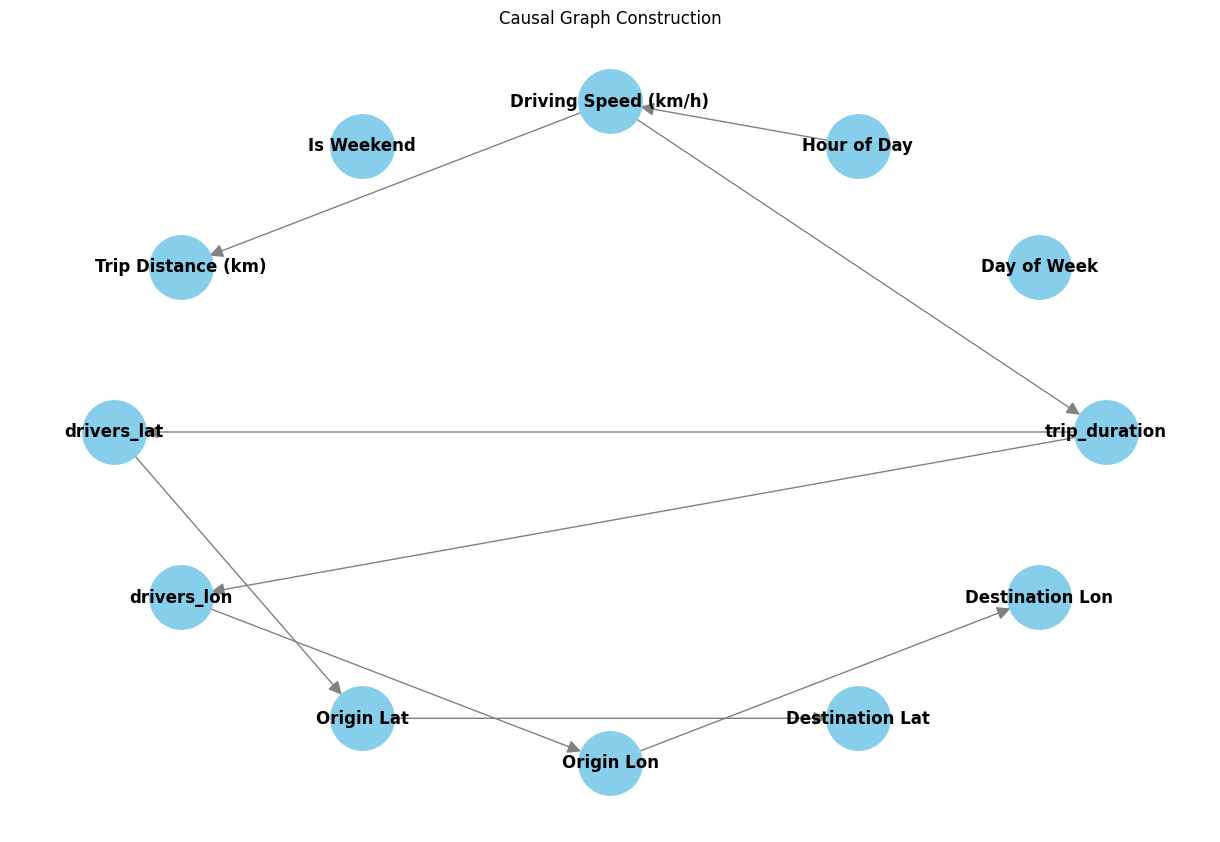

Model Nodes: ['trip_duration', 'Day of Week', 'Hour of Day', 'Driving Speed (km/h)', 'Is Weekend', 'Trip Distance (km)', 'drivers_lat', 'drivers_lon', 'Origin Lat', 'Origin Lon', 'Destination Lat', 'Destination Lon']
Model Edges: [('trip_duration', 'drivers_lat'), ('trip_duration', 'drivers_lon'), ('Hour of Day', 'Driving Speed (km/h)'), ('Driving Speed (km/h)', 'trip_duration'), ('Driving Speed (km/h)', 'Trip Distance (km)'), ('drivers_lat', 'Origin Lat'), ('drivers_lon', 'Origin Lon'), ('Origin Lat', 'Destination Lat'), ('Origin Lon', 'Destination Lon')]


In [12]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import PC

import networkx as nx
import matplotlib.pyplot as plt

# Load preprocessed data
preprocessed_data_path = '../data/preprocessed_data.csv'
try:
    df = pd.read_csv(preprocessed_data_path)
except FileNotFoundError:
    print(f"Error: File not found at {preprocessed_data_path}")
    raise

# Select relevant variables based on domain knowledge
variables = ['trip_duration', 'Day of Week', 'Hour of Day', 'Driving Speed (km/h)', 'Is Weekend',
             'Trip Distance (km)', 'drivers_lat', 'drivers_lon', 'Origin Lat', 'Origin Lon',
             'Destination Lat', 'Destination Lon']

# Check if selected variables exist in the DataFrame
missing_columns = [var for var in variables if var not in df.columns]
if missing_columns:
    print(f"Error: The following columns are missing from the DataFrame: {missing_columns}")
    raise KeyError(f"Missing columns: {missing_columns}")

# Create a subset DataFrame with selected variables
data = df[variables]

# Perform initial inspection
print(data.head())

# Define a Bayesian Network model
model = BayesianNetwork()

# Add nodes to the model (variables)
model.add_nodes_from(variables)

# Define the edges (causal relationships) based on domain knowledge or assumptions
edges = [
    ('Hour of Day', 'Driving Speed (km/h)'),
    ('Driving Speed (km/h)', 'trip_duration'),
    ('Driving Speed (km/h)', 'Trip Distance (km)'),
    ('trip_duration', 'drivers_lat'),
    ('trip_duration', 'drivers_lon'),
    ('drivers_lat', 'Origin Lat'),
    ('drivers_lon', 'Origin Lon'),
    ('Origin Lat', 'Destination Lat'),
    ('Origin Lon', 'Destination Lon')
]

# Add edges to the model
try:
    model.add_edges_from(edges)
except Exception as e:
    print(f"Error: Unable to add edges to the model. Details: {e}")
    raise

# Draw the graph (optional, for visualization)
plt.figure(figsize=(12, 8))

# Try a different layout to avoid potential issues with spring_layout
pos = nx.circular_layout(model)  # Circular layout for better stability
nx.draw(model, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray", linewidths=2, arrowsize=20)
plt.title("Causal Graph Construction")
plt.show()

# Validate the model against domain knowledge or literature
print("Model Nodes:", model.nodes())
print("Model Edges:", model.edges())

# Save the model structure (optional)
# model_structure = model.to_json()

# Further analysis and interpretation can follow based on the constructed model
